In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('./Assets/goldstock.csv')

data.head()    

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


Looking at data in the first instance and to decide thereof how it look to the eyes. From our data "goldstock.csv" we got a 'Unnamed: 0' column which seemingly duplicate our indexing and is of no aid to any analysis herein. I have decided therefore to do away with the column as in below cell.

In [3]:
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


We have cleaned-up the column 'Unnamed: 0' as you can see from the above cell.

In [4]:
data.describe()

,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,298.824811,97600.769382,299.118187,301.262244,296.417703
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


The above 'Describe' the data the method says giving summary innards of the nature of our data. We get to see the Counts of data per every columns, theirs means etcs as the above cell outputs.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


Checking the datatypes of every column. for our case all the datatypes are okay expect for the date column. We need therefore being a date column convert it to datatime datatype

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2511 non-null   datetime64[ns]
 1   Close   2511 non-null   float64       
 2   Volume  2511 non-null   float64       
 3   Open    2511 non-null   float64       
 4   High    2511 non-null   float64       
 5   Low     2511 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.8 KB


Now our Date columns datatype read correctly 'datetime64[ns]' datatype

In [7]:
nullValues = data.isnull().sum()

nullValues

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

We dive deeper to see if there is null values - these are EMPTY records interpesed in our data. For our case our data is clean of any nulls - this is because it has been pulled from a constrained database, which ensured that every record was present. This assured such integrity to our learning saample. Its a good news and luck maybe - finding no nulls.

##  Distributions
### Fig 1.0 

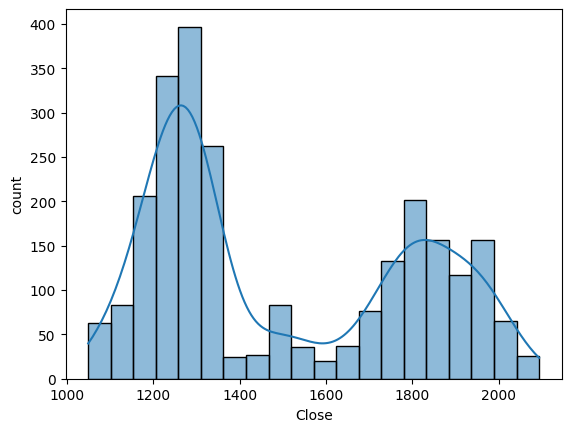

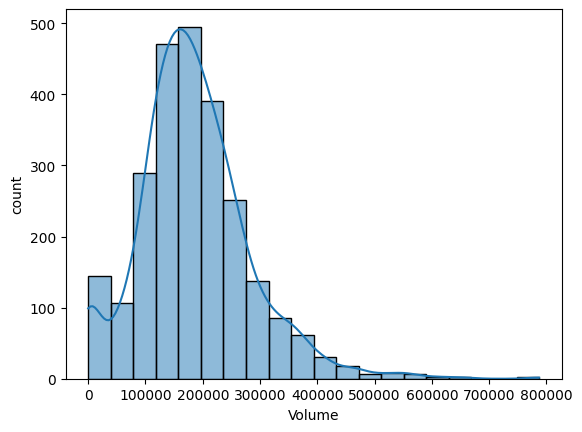

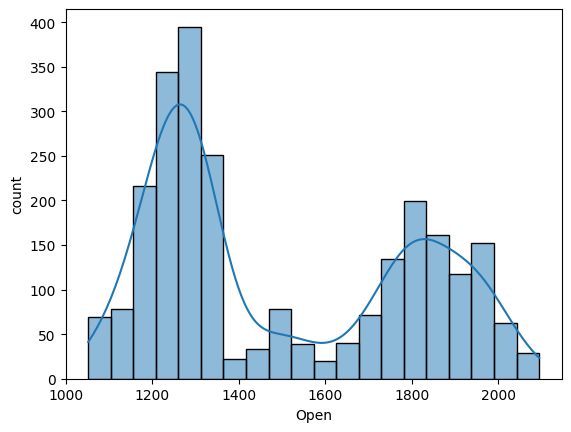

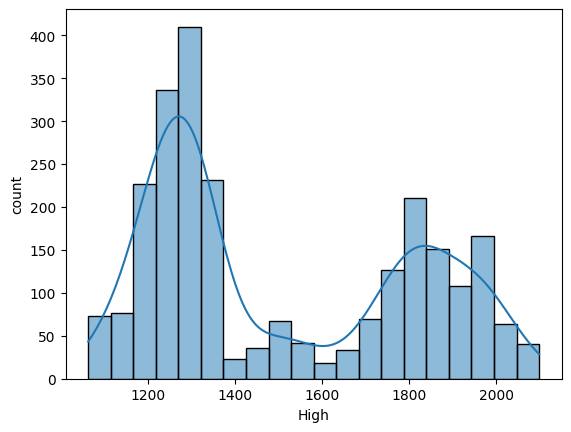

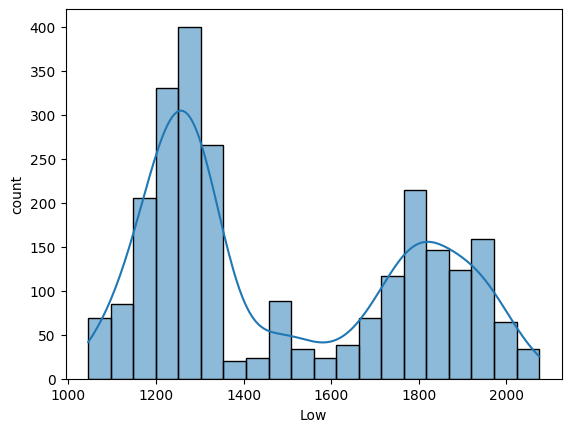

In [8]:
for col in data.columns:
    if data[col].dtype != 'datetime64[ns]':
        sns.histplot(data[col],bins=20,kde=True)
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

The above illustrate the distibution of each columns against the date columns. we derive the below insights as per chart below.

#### 1. Close-column

#### 2. Volumn-column

#### 3. High-column

#### 4. Low-column





## Time Series
### Fig 2.0

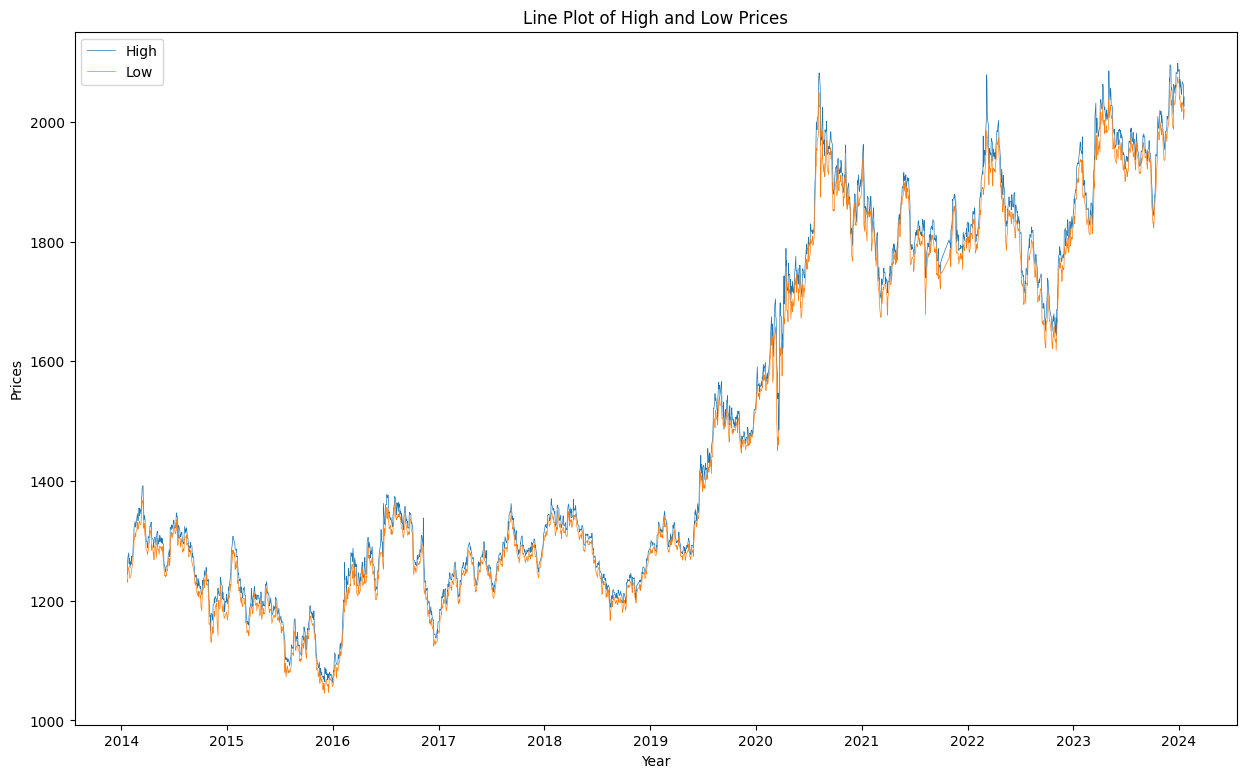

In [9]:
plt.figure(figsize=(15,9))
sns.lineplot(data=data, x='Date', y = 'High', label ='High',  linewidth = .5)
sns.lineplot(data=data, x='Date', y = 'Low', label ='Low' , linewidth = .5)
plt.legend()
plt.title('Line Plot of High and Low Prices')
plt.ylabel('Prices')
plt.xlabel('Year')
plt.show()

The plot above shows the climb of the gold prices as from year 2014 fron sligtly above 1200 and steadily climbing to the ceiling price of above price of 2000 in 2020. There is oscillation of prices 1600 - 2000 for from year 2020 to onwards

### Difference on Price
### Fig 2.1

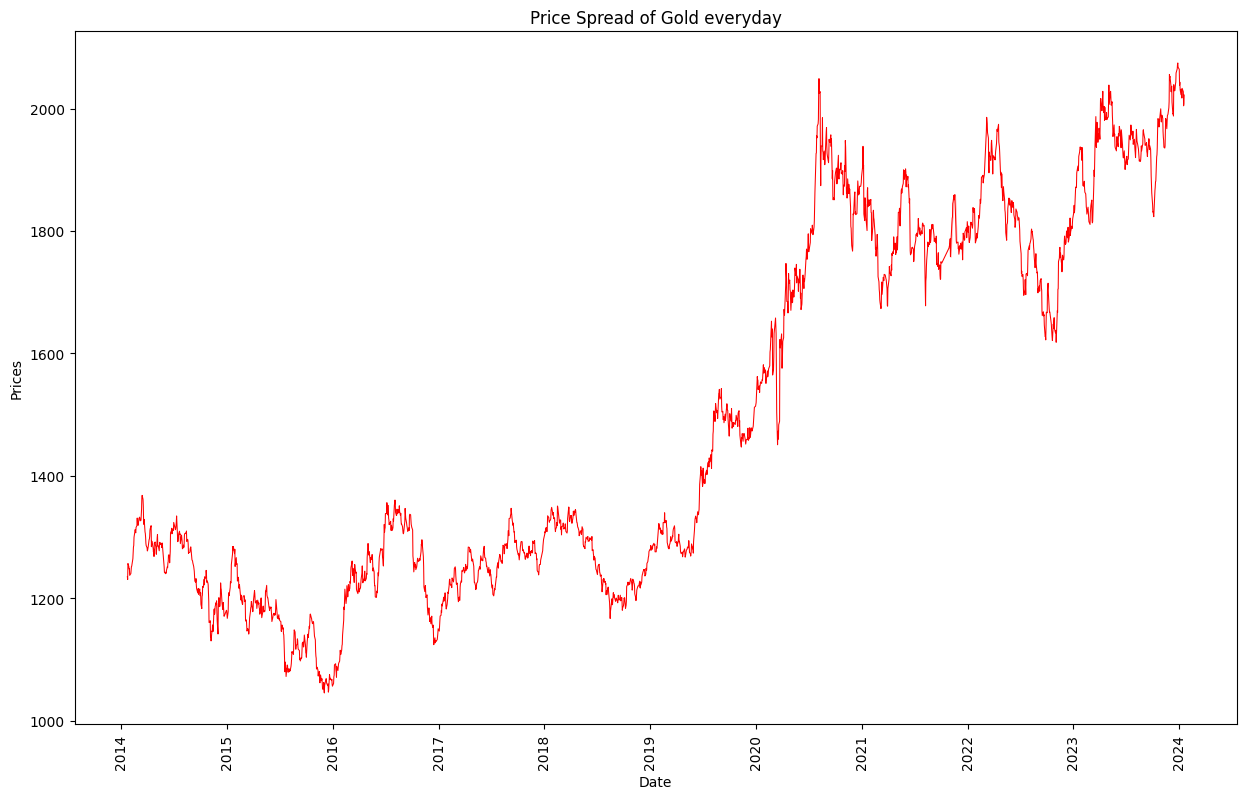

In [10]:
data['Price_Spread'] = data['High'] = data['Low']

plt.figure(figsize=(15,9))
plt.title('Price Spread of Gold everyday')
sns.lineplot(x = data['Date'], y = data['Price_Spread'], linewidth = .75, color = 'red')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Prices')
plt.show()

## Correlation Matrix

### Fig 2.3

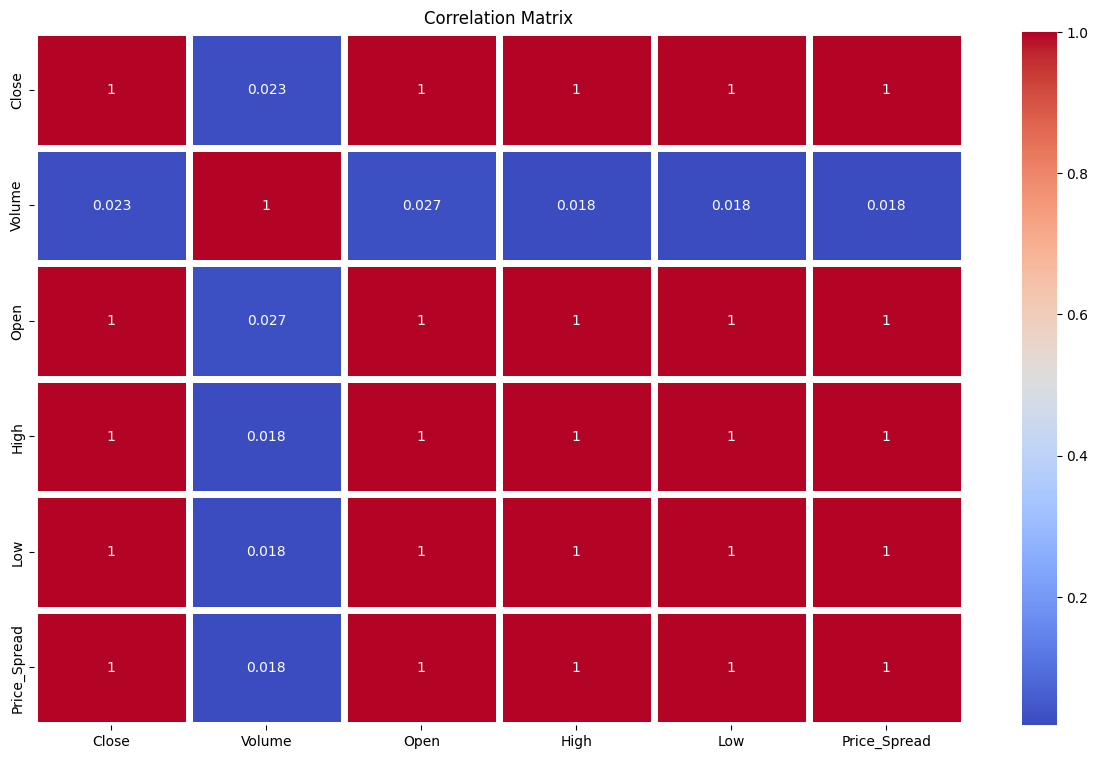

In [11]:
correlation_matrix = data.drop('Date', axis=1).corr()
plt.figure(figsize=(15,9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=5)
plt.title('Correlation Matrix')
plt.show()

## Linear Regrression Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import prophet

In [37]:
from prophet import Prophet
model_close = Prophet()
data.rename(columns={'Date':'ds','Close':'y'},inplace=True)
model_close.fit(data)       


17:26:33 - cmdstanpy - INFO - Chain [1] start processing
17:26:35 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
X = data[['Volume', 'Open', 'High', 'Low','Price_Spread']]
y = data['y']
y

0       2029.3
1       2021.6
2       2006.5
3       2030.2
4       2051.6
         ...  
2506    1250.5
2507    1263.5
2508    1264.5
2509    1262.5
2510    1238.6
Name: y, Length: 2511, dtype: float64

In [58]:
X.head(), y.head()

(     Volume    Open    High     Low  Price_Spread
 0  166078.0  2027.4  2022.2  2022.2        2022.2
 1  167013.0  2009.1  2007.7  2007.7        2007.7
 2  245194.0  2031.7  2004.6  2004.6        2004.6
 3  277995.0  2053.4  2027.6  2027.6        2027.6
 4  250946.0  2033.2  2033.1  2033.1        2033.1,
 0    2029.3
 1    2021.6
 2    2006.5
 3    2030.2
 4    2051.6
 Name: y, dtype: float64)

In [52]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = LinearRegression()



In [53]:
model.fit(X_train,y_train)

LinearRegression()

In [54]:
y_prediction = model.predict(X_test)
y_prediction[5]

1747.1227897784916

plt.scatter(X_test,y_test, color = 'blue')
plt.plot(X_test,y_prediction, color ='Green', linewidth=3)
plt.title("Linear Regression: Traded Volume Vs Closing Price")
plt.xlabel("Volume Traded")
plt.ylabel('Close Price')
plt.show()

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction, squared=False))

Mean Absolute Error: 5.886596276638797
Mean Squared Error: 70.2553196131146
Root Mean Squared Error: 8.381844642625786


In [56]:
predicted_data = pd.DataFrame({'Actual':y_test,
                                'Predicted':y_prediction})

predicted_data

,Actual,Predicted
443,1945.6,1942.866290
2417,1253.3,1248.061576
2404,1321.3,1321.831639
1575,1274.9,1273.306692
700,1728.8,1731.912744
...,...,...
1623,1273.4,1279.353540
554,1783.9,1785.268053
1033,1480.2,1488.147595
1421,1291.3,1294.242889


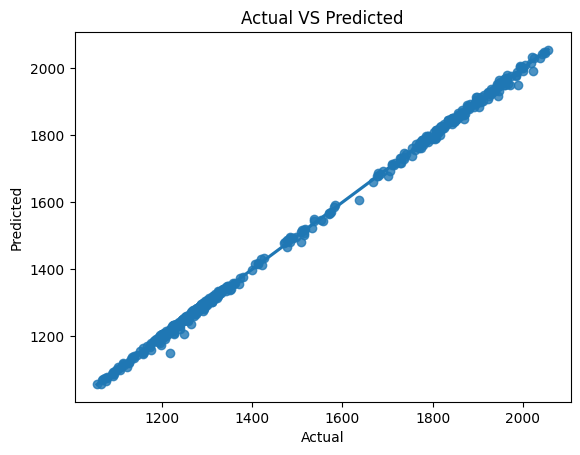

In [60]:
sns.regplot(x = 'Actual', y = 'Predicted', data=predicted_data)
plt.title('Actual VS Predicted')
plt.show()